In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions
using Plots

In [3]:
# generate data from a "switching gaussian regression"
n = 100

A = [0.9 0.1; 0.1 0.9]
β₁, β₂ = [1.0, 2.0], [2.0, 1.0]
σ²₁, σ²₂ = 1.0, 0.5

X = randn(n, 1)
X = [ones(n) X]

Y = zeros(n)
S = zeros(n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5))
    else
        S[i] = rand(Bernoulli(A[Int(S[i-1]) + 1, 1]) )
    end
    if S[i] == 0
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

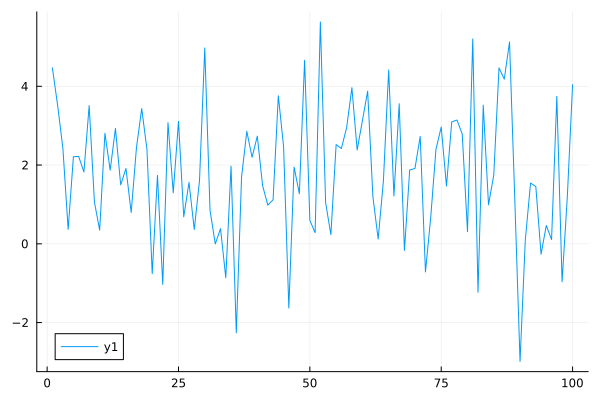

In [9]:
plot(Y)

In [10]:
model = SwitchingGaussianRegression(;K=2)

SwitchingGaussianRegression{Float64}([0.21691295115729026 0.7830870488427099; 0.09397071391942809 0.906029286080572], RegressionEmissions[RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true)), RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true))], [0.046201016438006066, 0.953798983561994], 2)

In [11]:
SSM.fit!(model, reshape(X[:, 2], length(X[:, 2]), 1), Y, 1000, 1e-3, true)

Log-Likelihood at iter 1: -9.44162815858871
Log-Likelihood at iter 2: -0.9661740535387168
Log-Likelihood at iter 3: -0.7313073736392733
Log-Likelihood at iter 4: -0.6852650096826157
Log-Likelihood at iter 5: -0.6592271730009143
Log-Likelihood at iter 6: -0.6361104988363688
Log-Likelihood at iter 7: -0.6177682549283767
Log-Likelihood at iter 8: -0.6055203822574936
Log-Likelihood at iter 9: -0.5979592984840795
Log-Likelihood at iter 10: -0.59302323785216
Log-Likelihood at iter 11: -0.5893507835851779
Log-Likelihood at iter 12: -0.5862782773913956
Log-Likelihood at iter 13: -0.5835106718319036
Log-Likelihood at iter 14: -0.5809035211562825
Log-Likelihood at iter 15: -0.5783672282467377
Log-Likelihood at iter 16: -0.5758321397971495
Log-Likelihood at iter 17: -0.57323572861056
Log-Likelihood at iter 18: -0.5705154849389034
Log-Likelihood at iter 19: -0.5676016317782063
Log-Likelihood at iter 20: -0.5644071998544861
Log-Likelihood at iter 21: -0.5608132277769193
Log-Likelihood at iter 22: -

In [12]:
model.B

2-element Vector{RegressionEmissions}:
 RegressionEmissions(Main.SSM.GaussianRegression([0.9153633683285489, 1.8748531280780494], 0.7130524105450042, true))
 RegressionEmissions(Main.SSM.GaussianRegression([1.8347817312649126, 0.9604718328234617], 0.45840714551083794, true))